In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [11]:
!pip install psycopg2

  Preparing metadata (setup.py) ... done
  Created wheel for psycopg2: filename=psycopg2-2.9.10-cp312-cp312-macosx_11_0_arm64.whl size=133407 sha256=59b5d8c44940feacf98afcc5aef97dd1426cc0a060bc53553ed1b628d66f2845
  Stored in directory: /Users/raghavkumar/Library/Caches/pip/wheels/ac/bb/ce/afa589c50b6004d3a06fc691e71bd09c9bd5f01e5921e5329b
Successfully built psycopg2


In [73]:
!pip install clickhouse-connect

In [89]:
# from sqlalchemy import create_engine
# from clickhouse_driver import Client

# # Database connection parameters
# db_config = {
#     'host': '10.3.155.14',
#     'port': 9000,  # Update with your port number
#     'dbname': 'atlas_dev',
#     'user': 'atlas_driver_offer_bpp_user'
# }

# clickhouse_config = {
#     'host': '10.3.155.14',
#     'port': 9000,  # Update with your port number
#     'dbname': 'atlas_dev',
#     'user': 'atlas_driver_offer_bpp_user'
# }

# def connect_db (db_config):
#   return create_engine(f"postgresql+psycopg2://{db_config['user']}@{db_config['host']}:{db_config['port']}/{db_config['dbname']}")

# def connect_clickhouse (clickhouse_config):
#   return Client(host=clickhouse_config['host'], port=clickhouse_config['port'], user=clickhouse_config['user'], database=clickhouse_config['dbname'])   

# def load_db_data(engine, schema, table_name):
#     """
#     Load data from a PostgreSQL table into a pandas DataFrame.

#     Args:
#     schema (str): Schema of the PostgreSQL table.
#     table_name (str): Name of the PostgreSQL table to load data from.

#     Returns:
#     pd.DataFrame: DataFrame containing data from the specified table.
#     """
#     full_table_name = f"{schema}.{table_name}"
#     query = f"SELECT * FROM {full_table_name}"
#     df = pd.read_sql(query, engine)
#     return df

## Getting driver data from metabase

In [259]:
import clickhouse_connect

client = clickhouse_connect.get_client(
    host='10.6.155.14',
    port=8123,
    username='default'
)

In [313]:
%%time

result = client.query_df('SELECT * FROM atlas_kafka.driver_eda_kafka LIMIT 5000000')
result

CPU times: user 21.7 s, sys: 2.38 s, total: 24.1 s
Wall time: 55.5 s


,driver_id,rid,ts,lat,lon,mid,updated_at,created_at,on_ride,active,...,mode,acc,rideStatus,st,speed,mocid,vehicle_variant,is_stop_detected,stop_lat,stop_lon
0,0001cd1f-d316-4005-9115-4dc6eb30c28e,,2024-12-13 16:34:05.062,12.8910382,74.9483467,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,<NA>,<NA>,0,1,...,ONLINE,2.2829999923706055,IDLE,2024-12-13 16:34:05,7.641946,5d660aa7-14ee-443e-a860-82348312c1fe,AUTO_RICKSHAW,0,0.0,0.0
1,0001cd1f-d316-4005-9115-4dc6eb30c28e,,2024-12-13 16:34:26.065,12.8894872,74.9484455,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,<NA>,<NA>,0,1,...,ONLINE,2.049999952316284,IDLE,2024-12-13 16:34:20,8.780102,5d660aa7-14ee-443e-a860-82348312c1fe,AUTO_RICKSHAW,0,0.0,0.0
2,0001cd1f-d316-4005-9115-4dc6eb30c28e,,2024-12-13 16:34:46.053,12.8883945,74.9493124,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,<NA>,<NA>,0,1,...,ONLINE,2.433000087738037,IDLE,2024-12-13 16:34:44,5.699955,5d660aa7-14ee-443e-a860-82348312c1fe,AUTO_RICKSHAW,0,0.0,0.0
3,0001cd1f-d316-4005-9115-4dc6eb30c28e,,2024-12-13 16:34:51.069,12.8884428,74.9495597,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,<NA>,<NA>,0,1,...,ONLINE,2.359999895095825,IDLE,2024-12-13 16:34:44,5.329684,5d660aa7-14ee-443e-a860-82348312c1fe,AUTO_RICKSHAW,0,0.0,0.0
4,0001cd1f-d316-4005-9115-4dc6eb30c28e,,2024-12-13 16:35:06.071,12.8879555,74.9497272,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,<NA>,<NA>,0,1,...,ONLINE,2.263000011444092,IDLE,2024-12-13 16:35:20,6.840510,5d660aa7-14ee-443e-a860-82348312c1fe,AUTO_RICKSHAW,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,00f0a048-1f91-4ceb-90bb-1811b9c39299,,2024-11-11 08:42:22.307,13.0125866,80.2283895,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,<NA>,<NA>,0,1,...,ONLINE,20.44300079345703,IDLE,2024-11-11 08:42:41,0.000000,4a95be1d-9052-4715-8cf5-ea8f68ffc85a,AUTO_RICKSHAW,0,0.0,0.0
4999996,00f0a048-1f91-4ceb-90bb-1811b9c39299,,2024-11-11 08:42:52.310,13.0126252,80.228392,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,<NA>,<NA>,0,1,...,ONLINE,23.368000030517575,IDLE,2024-11-11 08:43:00,0.000000,4a95be1d-9052-4715-8cf5-ea8f68ffc85a,AUTO_RICKSHAW,0,0.0,0.0
4999997,00f0a048-1f91-4ceb-90bb-1811b9c39299,,2024-11-11 08:43:22.416,13.0126683,80.2283991,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,<NA>,<NA>,0,1,...,ONLINE,23.834999084472656,IDLE,2024-11-11 08:43:39,0.000000,4a95be1d-9052-4715-8cf5-ea8f68ffc85a,AUTO_RICKSHAW,0,0.0,0.0
4999998,00f0a048-1f91-4ceb-90bb-1811b9c39299,,2024-11-11 08:44:48.584,13.0125831,80.2284159,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,<NA>,<NA>,0,1,...,ONLINE,25.277000427246097,IDLE,2024-11-11 08:44:56,0.000000,4a95be1d-9052-4715-8cf5-ea8f68ffc85a,AUTO_RICKSHAW,0,0.0,0.0


In [314]:
result.columns

Index(['driver_id', 'rid', 'ts', 'lat', 'lon', 'mid', 'updated_at',
       'created_at', 'on_ride', 'active', 'partition_date', 'date', 'mode',
       'acc', 'rideStatus', 'st', 'speed', 'mocid', 'vehicle_variant',
       'is_stop_detected', 'stop_lat', 'stop_lon'],
      dtype='object')

In [315]:
df = result.copy()

In [316]:
df[['lat', 'lon', 'on_ride']] = df[['lat', 'lon', 'on_ride']].apply(pd.to_numeric)

In [317]:
df_ranged = df.loc[(df['on_ride'] == 1) & (df['lat'] <= 13.2) & (df['lat'] >= 12.8) & (df['lon'] >= 77.3) & (df['lon'] <= 77.7) & (df['rideStatus'] != 'IDLE')]
df_ranged  # Ranged to the polyline used later

,driver_id,rid,ts,lat,lon,mid,updated_at,created_at,on_ride,active,...,mode,acc,rideStatus,st,speed,mocid,vehicle_variant,is_stop_detected,stop_lat,stop_lon
2945,0002daee-abab-4bd3-99aa-a0ade2f104e2,d2423a09-0682-4911-b46f-0652ec61575d,2024-12-13 03:42:22.975,12.891228,77.56122,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,<NA>,<NA>,1,1,...,ONLINE,1.315999984741211,ON_PICKUP,2024-12-13 03:42:18,0.000000,f067bccf-5b34-fb51-a5a3-9d6fa6baac26,AUTO_RICKSHAW,0,0.0,0.0
2946,0002daee-abab-4bd3-99aa-a0ade2f104e2,d2423a09-0682-4911-b46f-0652ec61575d,2024-12-13 03:42:43.337,12.891248,77.561188,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,<NA>,<NA>,1,1,...,ONLINE,2.616999864578247,ON_PICKUP,2024-12-13 03:42:42,0.000000,f067bccf-5b34-fb51-a5a3-9d6fa6baac26,AUTO_RICKSHAW,0,0.0,0.0
2947,0002daee-abab-4bd3-99aa-a0ade2f104e2,d2423a09-0682-4911-b46f-0652ec61575d,2024-12-13 03:42:44.982,12.891257,77.561183,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,<NA>,<NA>,1,1,...,ONLINE,2.0329999923706055,ON_PICKUP,2024-12-13 03:42:49,0.128452,f067bccf-5b34-fb51-a5a3-9d6fa6baac26,AUTO_RICKSHAW,0,0.0,0.0
2948,0002daee-abab-4bd3-99aa-a0ade2f104e2,d2423a09-0682-4911-b46f-0652ec61575d,2024-12-13 03:42:50.982,12.891268,77.561129,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,<NA>,<NA>,1,1,...,ONLINE,1.8910000324249268,ON_PICKUP,2024-12-13 03:42:49,2.331645,f067bccf-5b34-fb51-a5a3-9d6fa6baac26,AUTO_RICKSHAW,0,0.0,0.0
2949,0002daee-abab-4bd3-99aa-a0ade2f104e2,d2423a09-0682-4911-b46f-0652ec61575d,2024-12-13 03:42:52.982,12.891299,77.561059,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,<NA>,<NA>,1,1,...,ONLINE,1.600000023841858,ON_PICKUP,2024-12-13 03:42:49,4.370125,f067bccf-5b34-fb51-a5a3-9d6fa6baac26,AUTO_RICKSHAW,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991901,0339339d-5600-4f0d-ac69-0a6fe3473c80,accac23d-c355-4485-a4b3-73a9848f6969,2024-10-11 07:08:45.928,12.9743,77.596059,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,<NA>,<NA>,1,1,...,ONLINE,3.7899999618530273,ON_RIDE,2024-10-11 07:08:49,8.979882,f067bccf-5b34-fb51-a5a3-9d6fa6baac26,AUTO_RICKSHAW,<NA>,NaN,NaN
4991902,0339339d-5600-4f0d-ac69-0a6fe3473c80,accac23d-c355-4485-a4b3-73a9848f6969,2024-10-11 07:08:54.930,12.974826,77.596679,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,<NA>,<NA>,1,1,...,ONLINE,3.7899999618530273,ON_RIDE,2024-10-11 07:08:49,10.309949,f067bccf-5b34-fb51-a5a3-9d6fa6baac26,AUTO_RICKSHAW,<NA>,NaN,NaN
4991903,0339339d-5600-4f0d-ac69-0a6fe3473c80,accac23d-c355-4485-a4b3-73a9848f6969,2024-10-11 07:09:03.931,12.975354,77.597417,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,<NA>,<NA>,1,1,...,ONLINE,3.7899999618530273,ON_RIDE,2024-10-11 07:08:58,10.980419,f067bccf-5b34-fb51-a5a3-9d6fa6baac26,AUTO_RICKSHAW,<NA>,NaN,NaN
4991904,0339339d-5600-4f0d-ac69-0a6fe3473c80,accac23d-c355-4485-a4b3-73a9848f6969,2024-10-11 07:09:12.931,12.975788,77.597931,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,<NA>,<NA>,1,1,...,ONLINE,3.875999927520752,ON_RIDE,2024-10-11 07:09:05,2.574651,f067bccf-5b34-fb51-a5a3-9d6fa6baac26,AUTO_RICKSHAW,<NA>,NaN,NaN


In [318]:
df_ranged.drop(columns=['updated_at', 'created_at'])

,driver_id,rid,ts,lat,lon,mid,on_ride,active,partition_date,date,mode,acc,rideStatus,st,speed,mocid,vehicle_variant,is_stop_detected,stop_lat,stop_lon
2945,0002daee-abab-4bd3-99aa-a0ade2f104e2,d2423a09-0682-4911-b46f-0652ec61575d,2024-12-13 03:42:22.975,12.891228,77.56122,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,1,1,2024-12-13,2024-12-13 03:42:18,ONLINE,1.315999984741211,ON_PICKUP,2024-12-13 03:42:18,0.000000,f067bccf-5b34-fb51-a5a3-9d6fa6baac26,AUTO_RICKSHAW,0,0.0,0.0
2946,0002daee-abab-4bd3-99aa-a0ade2f104e2,d2423a09-0682-4911-b46f-0652ec61575d,2024-12-13 03:42:43.337,12.891248,77.561188,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,1,1,2024-12-13,2024-12-13 03:42:42,ONLINE,2.616999864578247,ON_PICKUP,2024-12-13 03:42:42,0.000000,f067bccf-5b34-fb51-a5a3-9d6fa6baac26,AUTO_RICKSHAW,0,0.0,0.0
2947,0002daee-abab-4bd3-99aa-a0ade2f104e2,d2423a09-0682-4911-b46f-0652ec61575d,2024-12-13 03:42:44.982,12.891257,77.561183,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,1,1,2024-12-13,2024-12-13 03:42:49,ONLINE,2.0329999923706055,ON_PICKUP,2024-12-13 03:42:49,0.128452,f067bccf-5b34-fb51-a5a3-9d6fa6baac26,AUTO_RICKSHAW,0,0.0,0.0
2948,0002daee-abab-4bd3-99aa-a0ade2f104e2,d2423a09-0682-4911-b46f-0652ec61575d,2024-12-13 03:42:50.982,12.891268,77.561129,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,1,1,2024-12-13,2024-12-13 03:42:49,ONLINE,1.8910000324249268,ON_PICKUP,2024-12-13 03:42:49,2.331645,f067bccf-5b34-fb51-a5a3-9d6fa6baac26,AUTO_RICKSHAW,0,0.0,0.0
2949,0002daee-abab-4bd3-99aa-a0ade2f104e2,d2423a09-0682-4911-b46f-0652ec61575d,2024-12-13 03:42:52.982,12.891299,77.561059,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,1,1,2024-12-13,2024-12-13 03:42:49,ONLINE,1.600000023841858,ON_PICKUP,2024-12-13 03:42:49,4.370125,f067bccf-5b34-fb51-a5a3-9d6fa6baac26,AUTO_RICKSHAW,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991901,0339339d-5600-4f0d-ac69-0a6fe3473c80,accac23d-c355-4485-a4b3-73a9848f6969,2024-10-11 07:08:45.928,12.9743,77.596059,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,1,1,2024-10-11,2024-10-11 07:08:49,ONLINE,3.7899999618530273,ON_RIDE,2024-10-11 07:08:49,8.979882,f067bccf-5b34-fb51-a5a3-9d6fa6baac26,AUTO_RICKSHAW,<NA>,NaN,NaN
4991902,0339339d-5600-4f0d-ac69-0a6fe3473c80,accac23d-c355-4485-a4b3-73a9848f6969,2024-10-11 07:08:54.930,12.974826,77.596679,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,1,1,2024-10-11,2024-10-11 07:08:49,ONLINE,3.7899999618530273,ON_RIDE,2024-10-11 07:08:49,10.309949,f067bccf-5b34-fb51-a5a3-9d6fa6baac26,AUTO_RICKSHAW,<NA>,NaN,NaN
4991903,0339339d-5600-4f0d-ac69-0a6fe3473c80,accac23d-c355-4485-a4b3-73a9848f6969,2024-10-11 07:09:03.931,12.975354,77.597417,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,1,1,2024-10-11,2024-10-11 07:08:58,ONLINE,3.7899999618530273,ON_RIDE,2024-10-11 07:08:58,10.980419,f067bccf-5b34-fb51-a5a3-9d6fa6baac26,AUTO_RICKSHAW,<NA>,NaN,NaN
4991904,0339339d-5600-4f0d-ac69-0a6fe3473c80,accac23d-c355-4485-a4b3-73a9848f6969,2024-10-11 07:09:12.931,12.975788,77.597931,7f7896dd-787e-4a0b-8675-e9e6fe93bb8f,1,1,2024-10-11,2024-10-11 07:09:05,ONLINE,3.875999927520752,ON_RIDE,2024-10-11 07:09:05,2.574651,f067bccf-5b34-fb51-a5a3-9d6fa6baac26,AUTO_RICKSHAW,<NA>,NaN,NaN


## Snap to polyline

Got polyline from the google sheet

In [60]:
import polyline as pl

In [192]:
coords = pl.decode(r'olrnAkfqxMuZtdBDpC??FlC??D`BBhA??@J?H???^??DtADjA??Bj@??Dp@~Cf[vO|V????@f@??@R?~C??@bB???pAAjA?nACf@Er@Ev@Gp@Ah@??E\??C\??K|@QjBKdAGz@??Gj@?p@@RFZEz@??Ff@??Hd@??FZ??BV@F??Pv@??F\f@vB??^bBR~@Jb@??Rr@XlA??FR??P~@??TdA??RbA??h@hC??Lj@??Rv@??R|@??f@rB??DT??Nn@FTHV??FLXt@??DP??`AfE??TdA??Lf@??FZ??JZN\??JVHJDJV`@JLdgAn]EH??QI??IP??_@v@??MV}AjD??EJ??Sd@??kAbC??~@b@r@Z??j@XrB~@??r@\l@Z??d@R??v@\??~@h@??v@^??v@`@??r@X??v@^??bAd@vCxA|At@????JD??~At@tB`A??pB~@??DABAB?H@??HB??XLn@V\J??bAX??j@J??j@N??f@J??b@L^F??r@H??t@DlAJlALjD^??NV??j@H??h@Hn@LdAR??`C`@??hIdB??lCv@|@X@?jA`@n@Xz@^jAl@`Ah@`E~B??f@^@@VR\X\V`@b@\^h@j@??\\ZVt@f@zAv@LFf@P??JDn@N??ZH??NDt@J??ZDZDj@Bd_@xBxXfKd^vM??XG??tBt@??f@L??HB??z@T\Ld@LdB^lEdA??vAZ????jCh@??|FzA??fAV??nBf@??h@L??RF??ND??Yx@??o@bD??o@zBKX]`A??Sx@??Kr@Ev@??@l@@R@Hf@dB??j@|B??Jn@@FFj@??`AHtBT??`@d@d@f@??t@j@??YjB??|C^n`AdU`Bf@f@P??lAh@vAr@r@^|DzBHDXN??v@d@??RL??|A`A??lBjA??ZL??ZJ\J??fAZ??n@P??x@T??RF??b@L??t@V??RF??F@^N??pAd@??fDjA??dA\??RH??ZH??F@??HB??z@RPB??d@HT@VBb@@d@@Z?p@Ah@?`@Ch@E??lAUTEREVCRAF?F?tAJZD\Dv@Nx[|Hhc@fU????ND??\Db@HTDRBLD^FJBNDNDFDFB??BDLNDJ|@xAb@x@p@pAFJHHRX??TTNN`@Vf@XPH??D@PHt@P??j@LnARND??b@H??z@N??l@PRF??RHPDNHh@T??v@^??xAz@??JFbBbA????PN??n@b@ZN??p@`@??t@d@??v@`@??LHXN??j@XVLLDND??lAf@??NF\JVJb@J??nAb@??rA^??~@^??n@R|A^??hAXLBbE\??jAL??rEVz@F??ZB??r@H??nCT??J@??H@??XD??b@F??n@H??F@~ShO`w@z]dCn@??b@L??`@H??nEjA??dAV??hAZ??|@V??z@R??`AT????v@T??~@X??hAVpBl@v@R??hBd@bBd@??b@L??r@T??nAZ??HBpBh@??PF??`@J??|Bt@B@HH??tFxAZHhDz@??nCr@XJbi@lz@')
len(coords)

581

In [92]:
coords[:15]

[(13.0428, 77.58966),
 (13.04723, 77.57339),
 (13.0472, 77.57266),
 (13.0472, 77.57266),
 (13.04716, 77.57195),
 (13.04716, 77.57195),
 (13.04713, 77.57146),
 (13.04711, 77.57109),
 (13.04711, 77.57109),
 (13.0471, 77.57103),
 (13.0471, 77.57098),
 (13.0471, 77.57098),
 (13.0471, 77.57082),
 (13.0471, 77.57082),
 (13.04707, 77.57039)]

In [227]:
coords[-15:]

[(12.91537, 77.48189),
 (12.91537, 77.48189),
 (12.9152, 77.48183),
 (12.9152, 77.48183),
 (12.91457, 77.48156),
 (12.91455, 77.48155),
 (12.9145, 77.4815),
 (12.9145, 77.4815),
 (12.91327, 77.48105),
 (12.91313, 77.481),
 (12.91228, 77.4807),
 (12.91228, 77.4807),
 (12.91156, 77.48044),
 (12.91143, 77.48038),
 (12.90469, 77.47087)]

Smoothing out the polyline

In [479]:
import math
def calc_angle(vec1, vec2):
    dot_p = vec1[0] * vec2[0] + vec1[1] * vec2[1]
    mag_v1 = math.sqrt(vec1[0] ** 2 + vec1[1] ** 2)
    mag_v2 = math.sqrt(vec2[0] ** 2 + vec2[1] ** 2)
    # print(mag_v1 * mag_v2)
    return math.degrees(math.acos(dot_p / (mag_v1 * mag_v2)))

In [492]:
def selective_smoothing(polyline, angle_threshold=20, window_size=3):
    smoothed = [polyline[0]]  # Keep the first point
    for i in range(1, len(polyline) - 1):
        if (polyline[i] == polyline[i - 1] or polyline[i] == polyline[i + 1]):
            start = max(0, i - window_size // 2)
            end = min(len(polyline), i + window_size // 2 + 1)
            x_avg = sum(p[0] for p in polyline[start:end]) / (end - start)
            y_avg = sum(p[1] for p in polyline[start:end]) / (end - start)
            smoothed.append((x_avg, y_avg))
            continue
        # Vectors for angle calculation
        v1 = (polyline[i][0] - polyline[i - 1][0], polyline[i][1] - polyline[i - 1][1])
        v2 = (polyline[i + 1][0] - polyline[i][0], polyline[i + 1][1] - polyline[i][1])

        # Calculate angle and determine smoothing
        angle = calc_angle(v1, v2)
        if angle < angle_threshold:
            smoothed.append(polyline[i])  # Preserve sharp turn points
        else:
            # Apply moving average for straight segments
            start = max(0, i - window_size // 2)
            end = min(len(polyline), i + window_size // 2 + 1)
            x_avg = sum(p[0] for p in polyline[start:end]) / (end - start)
            y_avg = sum(p[1] for p in polyline[start:end]) / (end - start)
            smoothed.append((x_avg, y_avg))

    smoothed.append(polyline[-1])  # Keep the last point
    return smoothed

In [493]:
smoothed_coords = selective_smoothing(coords)
len(smoothed_coords)

581

In [494]:
smoothed_coords[:15]

[(13.0428, 77.58966),
 (13.04723, 77.57339),
 (13.04721, 77.57290333333333),
 (13.047186666666667, 77.57242333333333),
 (13.047173333333333, 77.57218666666667),
 (13.04715, 77.57178666666667),
 (13.04713, 77.57146),
 (13.047116666666668, 77.57121333333333),
 (13.047106666666666, 77.57107),
 (13.0471, 77.57103),
 (13.0471, 77.57099666666666),
 (13.0471, 77.57092666666667),
 (13.0471, 77.57087333333334),
 (13.047089999999999, 77.57067666666667),
 (13.04707, 77.57039)]

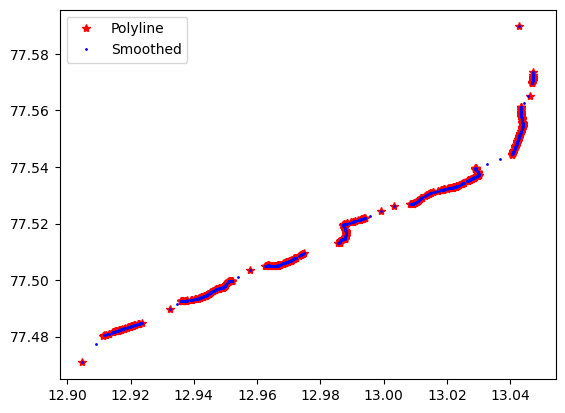

In [547]:
import matplotlib.pyplot as plt
x, y = zip(*coords)
smooth_x, smooth_y = zip(*smoothed_coords)

plt.plot(x, y, 'r*', label='Polyline')
plt.plot(smooth_x, smooth_y, 'bo', markersize=1,label='Smoothed')
plt.legend()
plt.show()

Questions: Did we manually get the polylines for each route in bangalore? If not, how did we get that? 

This will help to come up with idea for splitting into road segments

In [469]:
import requests

In [470]:
def snap_to_road(lat, lon, num=1):
    osrm_matching_url = "http://router.project-osrm.org/nearest/v1/driving/{lon},{lat}?number={num}"
    response = requests.get(osrm_matching_url.format(lat=lat, lon=lon, num=num))
    waypoints = response.json()['waypoints']
    final = []
    for waypoint in waypoints:
        final.append((waypoint['location'][::-1], waypoint['distance']))
    return(final)

In [190]:
%%time

snap_to_road(13.0473, 77.58, num=3)

CPU times: user 4.65 ms, sys: 5.29 ms, total: 9.94 ms
Wall time: 315 ms


[([13.047218, 77.579941], 11.102050902),
 ([13.047294, 77.57983], 18.452503651),
 ([13.047128, 77.579864], 24.077329564)]

In [545]:
%%time

snapped_coords = []
for coord in smoothed_coords:
    lat, lon = coord
    loc = snap_to_road(lat, lon)
    snapped_coords.append((loc[0][0][0], loc[0][0][1]) if loc else None)
snapped_coords[:15]

CPU times: user 2.73 s, sys: 851 ms, total: 3.58 s
Wall time: 4min 50s


[(13.042793, 77.589661),
 (13.04721, 77.573391),
 (13.047198, 77.572903),
 (13.047172, 77.572424),
 (13.047159, 77.572188),
 (13.047136, 77.571788),
 (13.047117, 77.571461),
 (13.047102, 77.571214),
 (13.047093, 77.571071),
 (13.047091, 77.571031),
 (13.047089, 77.570998),
 (13.047085, 77.570928),
 (13.047082, 77.570874),
 (13.04707, 77.570678),
 (13.047053, 77.570391)]

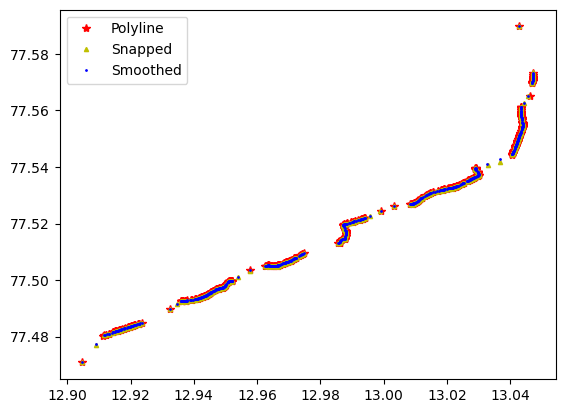

In [546]:
x, y = zip(*coords)
smooth_x, smooth_y = zip(*smoothed_coords)
snap_x, snap_y = zip(*snapped_coords)

plt.plot(x, y, 'r*', label='Polyline')
plt.plot(snap_x, snap_y, 'y^', markersize=3,label='Snapped')
plt.plot(smooth_x, smooth_y, 'bo', markersize=1, label='Smoothed')
plt.legend()
plt.show()

## Splitting into road segments

In [344]:
calc_angle([1, 2], [3, 4])

10.304846468766044

In [551]:
def split_polyline(polyline, angle_threshold=20):
    res = []
    current = [polyline[0]]
    for i in range(1, len(polyline) - 2):
        # print(f"{i}: ", end='') 
        if (polyline[i] == polyline[i - 1] or polyline[i] == polyline[i + 1]):
            current.append(polyline[i])
            continue
        vec1 = (polyline[i][0] - polyline[i - 1][0], polyline[i][1] - polyline[i - 1][1])
        # print(vec1)
        vec2 = (polyline[i + 1][0] - polyline[i][0], polyline[i + 1][1] - polyline[i][1])
        # print(vec2)
        # vec3 = (polyline[i + 2][0] - polyline[i + 1][0], polyline[i + 2][1] - polyline[i + 1][1])
        angle1 = calc_angle(vec1, vec2)
        # angle2 = calc_angle(vec2, vec3)
        current.append(polyline[i])
        
        if angle1 > angle_threshold:  
            res.append(current)
            current = [polyline[i]]

    current.append(polyline[-1])
    res.append(current)
    return res 

In [564]:
segments = split_polyline(snapped_coords, angle_threshold=7)

In [567]:
for i in segments[1]:
    print(f"{i[0]} {i[1]}")

13.04721 77.573391
13.047198 77.572903
13.047172 77.572424
13.047159 77.572188
13.047136 77.571788
13.047117 77.571461
13.047102 77.571214
13.047093 77.571071
13.047091 77.571031
13.047089 77.570998
13.047085 77.570928
13.047082 77.570874
13.04707 77.570678
13.047053 77.570391
13.047039 77.570138
13.047015 77.56994
13.047004 77.569866
13.046983 77.569711
13.04696 77.569544


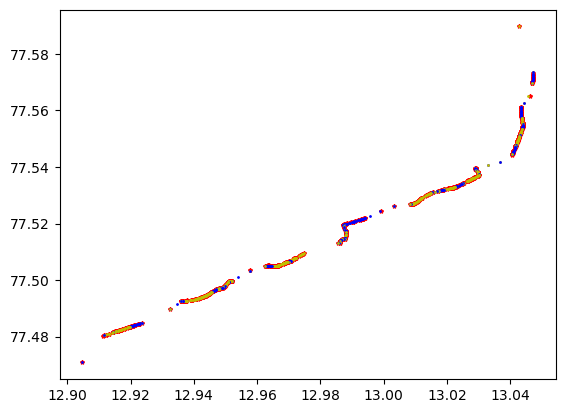

In [566]:
x, y = zip(*coords)
plt.plot(x, y, 'r*', markersize=3)
for i, segment in enumerate(segments):
    col = 'yo'
    if i % 2:
        col = 'bo'
    coord_x, coord_y = zip(*segment)
    plt.plot(coord_x, coord_y, col, markersize=1)

In [539]:
segments[0]

[(13.042793, 77.589661), (13.04721, 77.573391)]

Apparently OSM has tags for whether a road is a highway or not. Although some people have spoken about how it's not possible to make a genralized splitting algorithm for that data. 

Still looking for ways to segment polyline that has been made already and put on the internet somewhere

# OSMnx testing

In [579]:
!pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 2.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 2.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 1.0 MB/s eta 0:00:00eta 0:00:01


In [580]:
import osmnx as ox

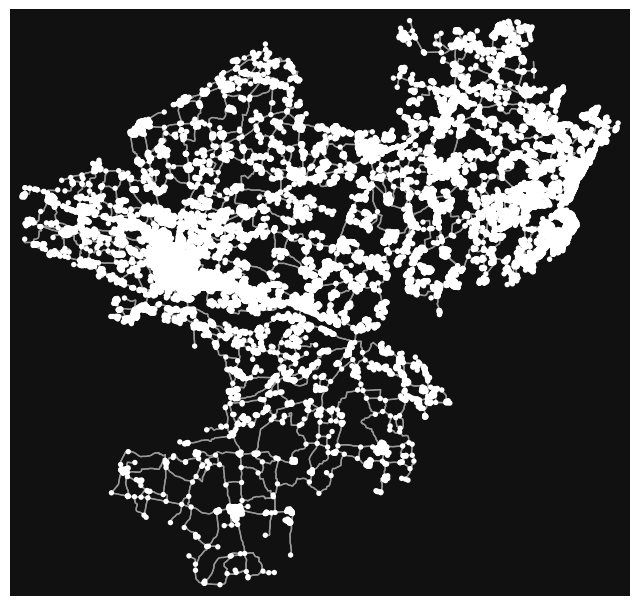

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [589]:
ox.plot_graph(ox.graph_from_place('Kanchipuram, India', network_type='drive'))

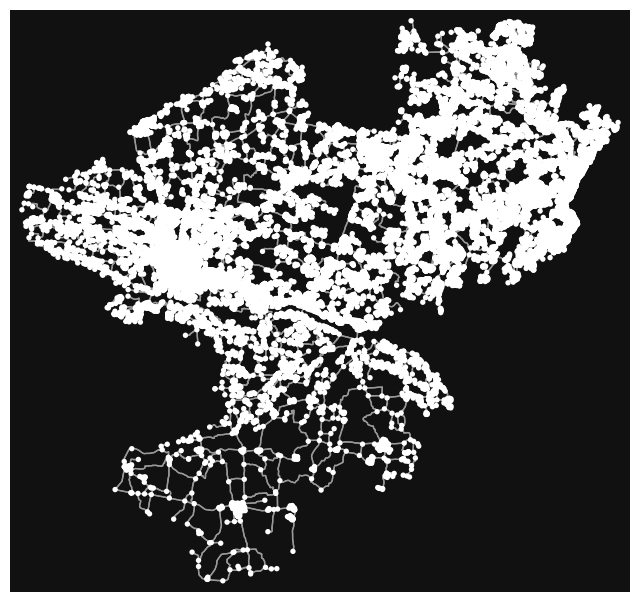

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [590]:
ox.plot_graph(ox.graph_from_place('Kanchipuram, India'))

In [658]:
graph = ox.graph_from_place('Kanchipuram, India', which_result=1)

In [655]:
graph_bang = ox.graph_from_place('Bangalore, India', which_result=1)

In [661]:
graph

In [593]:
graph.graph

{'created_date': '2025-01-16 12:24:24',
 'created_with': 'OSMnx 2.0.1',
 'crs': 'epsg:4326',
 'simplified': True}

In [692]:
i = 0
for n, nbrsdict in graph.adjacency():
    print(f"\n{n}")
    for nbr, keydict in nbrsdict.items():
        for key, eattr in keydict.items():
            print(f"\t{eattr}")
    i += 1
    if (i == 1000):
        break


245608206
	{'osmid': 22832406, 'highway': 'primary', 'name': 'Kancheepuram - Vandavasi Road', 'ref': 'SH116', 'oneway': False, 'reversed': False, 'length': 2486.864087739933, 'geometry': <LINESTRING (79.647 12.63, 79.653 12.637, 79.653 12.638, 79.653 12.64, 79.65...>}
	{'osmid': 688739720, 'highway': 'primary', 'lanes': '2', 'name': 'Bukkathurai - Uthiramerur Road', 'ref': 'SH118', 'oneway': False, 'reversed': False, 'length': 1572.9451505300067, 'geometry': <LINESTRING (79.647 12.63, 79.647 12.63, 79.655 12.629, 79.661 12.628)>}

245610941
	{'osmid': 832908782, 'highway': 'primary', 'name': 'Kancheepuram - Vandavasi Road', 'ref': 'SH116', 'oneway': False, 'reversed': False, 'length': 58.09960866988747}
	{'osmid': 832908782, 'highway': 'primary', 'name': 'Kancheepuram - Vandavasi Road', 'ref': 'SH116', 'oneway': False, 'reversed': True, 'length': 45.43628287198798}
	{'osmid': 32761612, 'highway': 'tertiary', 'name': 'Vilakkadi Koil Street', 'oneway': False, 'reversed': True, 'length':

In [646]:
i = 0
for u, v, keys, data in graph.edges(data="name", keys=True):
    print(f"{u}, {v}, {keys}, {data}")
    i += 1
    if (i == 10):
        break

245608206, 4657483844, 0, Kancheepuram - Vandavasi Road
245608206, 11402683159, 0, Bukkathurai - Uthiramerur Road
245610941, 7775372716, 0, Kancheepuram - Vandavasi Road
245610941, 2407611861, 0, Kancheepuram - Vandavasi Road
245610941, 368979864, 0, Vilakkadi Koil Street
245616392, 7719971859, 0, Thandalam - Perambakkam - Thakkolam - Arugilpadi Road
245616392, 3874393084, 0, Thandalam - Perambakkam - Thakkolam - Arugilpadi Road
245616392, 7719971835, 0, Prayanguppam Road
245616740, 7779991500, 0, Singaperumalkoil - Sriperumbudur - Thiruvallur - Red Hills Road
247329280, 7822241184, 0, None


In [598]:
245608206 in graph

True

In [600]:
22832406 in graph

False

In [644]:
graph.edges(list(graph.nodes)[0])

OutMultiEdgeDataView([(245608206, 4657483844), (245608206, 11402683159)])

In [645]:
graph.nodes[4657483844]

{'y': 12.650268, 'x': 79.6548254, 'street_count': 3}

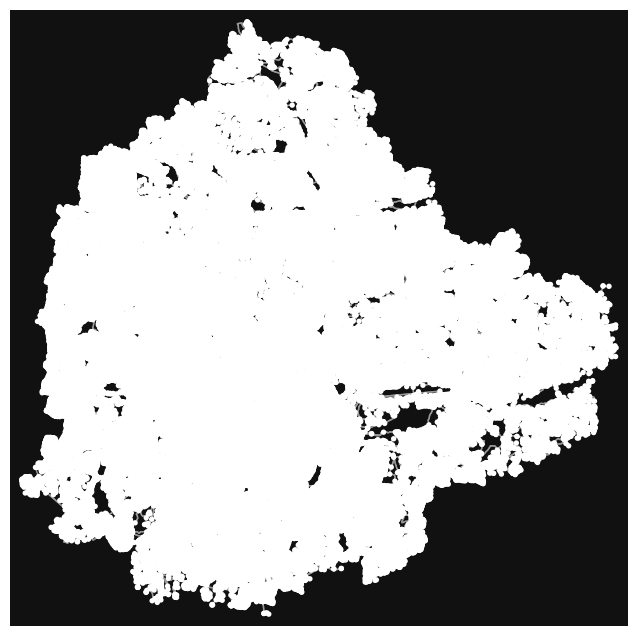

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [677]:
ox.plot_graph(graph_bang)

In [693]:
ox.nearest_edges(graph_bang, 77.58966, 13.0428)

(10547634362, 308080675, 0)

In [699]:
graph_bang.edges[10547634362, 308080675, 0]

{'osmid': 369786367,
 'highway': 'trunk',
 'lanes': '3',
 'maxspeed': '60',
 'name': 'Outer Ring Road',
 'oneway': True,
 'ref': 'NH75',
 'reversed': False,
 'length': 83.92940707451626,
 'geometry': <LINESTRING (77.59 13.043, 77.59 13.043, 77.59 13.043, 77.59 13.043, 77.59 1...>}

In [688]:
for n, nbrdict in graph_bang.adjacency():
    if n == 12401455468:
        print(nbrdict)

{3868574353: {0: {'osmid': 383579363, 'highway': 'residential', 'oneway': False, 'reversed': False, 'length': 89.75605397567696}}, 3868574356: {0: {'osmid': 383579363, 'highway': 'residential', 'oneway': False, 'reversed': True, 'length': 134.27216116485832}}, 12401455470: {0: {'osmid': 1340688342, 'highway': 'residential', 'oneway': False, 'reversed': False, 'length': 34.20384711535418, 'geometry': <LINESTRING (77.493 13.071, 77.493 13.071, 77.493 13.071)>}}}


In [698]:
graph_bang.nodes[308080675]

{'y': 13.0427369, 'x': 77.5893148, 'street_count': 3}

In [766]:
graph_heb.nodes[3826215062]

{'y': 13.0472124, 'x': 77.5734854, 'street_count': 3}

In [778]:
lons = np.array([])
lats = np.array([])
for lat, lon in snapped_coords:
    lons = np.append(lons, lon)
    lats = np.append(lats, lat)

In [779]:
edges = ox.nearest_edges(graph_bang, lons, lats)

In [780]:
(edges)

array([(10547634362, 308080675, 0), (3826215062, 5392857471, 0),
       (3826215062, 5392857471, 0), (3826215062, 5392857471, 0),
       (3826215062, 5392857471, 0), (3826215062, 5392857471, 0),
       (3826215062, 5392857471, 0), (3826215062, 5392857471, 0),
       (3826215062, 5392857471, 0), (3826215062, 5392857471, 0),
       (3826215062, 5392857471, 0), (5392857471, 10845425997, 0),
       (5392857471, 10845425997, 0), (5392857471, 10845425997, 0),
       (5392857471, 10845425997, 0), (5392857471, 10845425997, 0),
       (10845425997, 11229706412, 0), (10845425997, 11229706412, 0),
       (10845425997, 11229706412, 0), (11229706412, 2446005991, 0),
       (9189030568, 529372241, 0), (2446005991, 1078399170, 0),
       (11554370596, 11554370597, 0), (11554370597, 1078399174, 0),
       (11554370597, 1078399174, 0), (11554370597, 1078399174, 0),
       (1078399174, 10023329796, 0), (1078399174, 10023329796, 0),
       (10023329796, 1078399184, 0), (10023329796, 1078399184, 0),
     

In [798]:
from itertools import groupby
clean_edges = [key for key, _group in groupby(edges)]

In [818]:
for i, elem in enumerate(clean_edges):
    clean_edges[i] = elem[0]

In [819]:
clean_edges

[10547634362,
 3826215062,
 5392857471,
 10845425997,
 11229706412,
 9189030568,
 2446005991,
 11554370596,
 11554370597,
 1078399174,
 10023329796,
 1078399184,
 1078399184,
 11554370600,
 11554370601,
 10023347921,
 1078399170,
 521144460,
 521144462,
 521144462,
 11121238977,
 598947971,
 598947965,
 598947970,
 521144224,
 598947959,
 598947960,
 10023216324,
 598947945,
 598947939,
 12194421870,
 10039201707,
 10175102591,
 12194421872,
 11601696870,
 11601696870,
 11601696870,
 7175450088,
 11964711963,
 10039201669,
 11964711964,
 10039201669,
 11921336863,
 463392781,
 463392823,
 463392814,
 463392819,
 463392809,
 463392802,
 10039201630,
 463392784,
 308071900,
 11886100897,
 11886114678,
 463429500,
 9366790018,
 3758538863,
 11888304861,
 9363763133,
 1559233238,
 4880496574,
 1559233119,
 10001174201,
 1559233720,
 10003492074,
 1559233137,
 10003492074,
 11873481254,
 2447900544,
 2447900543,
 1551874321,
 10003592449,
 12145880008,
 10063886316,
 10063886302,
 100638862

In [820]:
graph_heb = ox.graph_from_address('Hebbal, Karnataka, India', dist=10000)

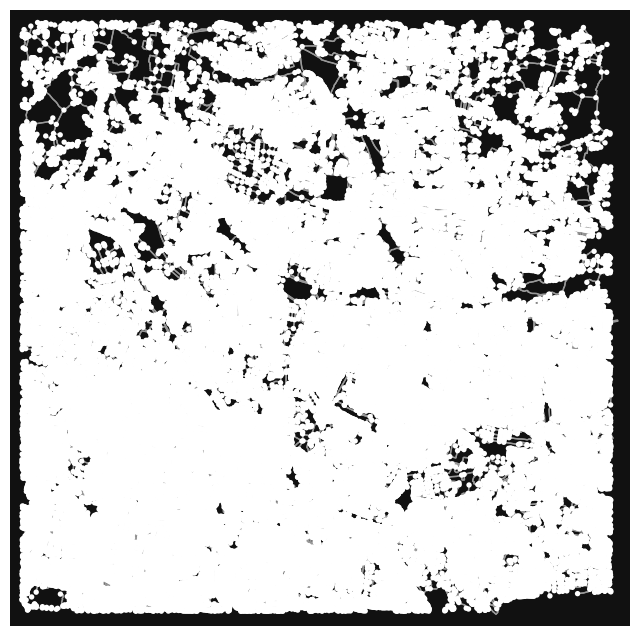

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [821]:
ox.plot_graph(graph_heb)

In [824]:
df = ox.graph_to_gdfs(graph_bang)

In [842]:
df[0]

,y,x,street_count,highway,junction,ref,railway,geometry
osmid,,,,,,,,
17327095,12.910542,77.598721,4,NaN,NaN,NaN,NaN,POINT (77.59872 12.91054)
17327139,12.934965,77.624072,3,NaN,NaN,NaN,NaN,POINT (77.62407 12.93497)
17327141,12.938493,77.629168,3,NaN,NaN,NaN,NaN,POINT (77.62917 12.93849)
17327420,13.095224,77.594178,3,traffic_signals,NaN,NaN,NaN,POINT (77.59418 13.09522)
17327429,12.993304,77.583961,3,NaN,NaN,NaN,NaN,POINT (77.58396 12.9933)
...,...,...,...,...,...,...,...,...
12506572909,13.072568,77.566029,1,NaN,NaN,NaN,NaN,POINT (77.56603 13.07257)
12506577683,12.997943,77.517896,1,NaN,NaN,NaN,NaN,POINT (77.5179 12.99794)
12506585838,13.025605,77.548130,1,NaN,NaN,NaN,NaN,POINT (77.54813 13.0256)


In [871]:
for i in graph_bang.neighbors(12229802215):
    print(i)

12229802214
5354313585


In [860]:
graph_bang.edges[(12506572909, 12506572907, 0)]['geometry']

{'osmid': 1351772150,
 'highway': 'residential',
 'oneway': False,
 'reversed': False,
 'length': 34.97795872089388,
 'geometry': <LINESTRING (77.566 13.073, 77.566 13.073, 77.566 13.072)>}

In [882]:
graph_bang.nodes[17327095]

{'y': 12.9105419, 'x': 77.5987208, 'street_count': 4}

In [890]:
df[0].loc[df[0]['street_count'] <= 1]

,y,x,street_count,highway,junction,ref,railway,geometry
osmid,,,,,,,,
26529612,12.977083,77.619863,1,NaN,NaN,NaN,NaN,POINT (77.61986 12.97708)
247860622,12.895971,77.601750,1,NaN,NaN,NaN,NaN,POINT (77.60175 12.89597)
247964246,12.893959,77.600493,1,NaN,NaN,NaN,NaN,POINT (77.60049 12.89396)
247964256,12.894543,77.600829,1,NaN,NaN,NaN,NaN,POINT (77.60083 12.89454)
247968559,12.896019,77.604134,1,NaN,NaN,NaN,NaN,POINT (77.60413 12.89602)
...,...,...,...,...,...,...,...,...
12506482799,13.053830,77.556461,1,NaN,NaN,NaN,NaN,POINT (77.55646 13.05383)
12506572909,13.072568,77.566029,1,NaN,NaN,NaN,NaN,POINT (77.56603 13.07257)
12506577683,12.997943,77.517896,1,NaN,NaN,NaN,NaN,POINT (77.5179 12.99794)
